In [1]:
import sys
sys.path.append("../..")

In [6]:
import random
import numpy as np

from tangle.core import Tangle, Transaction
from tangle.core.tip_selection import TipSelector
from tangle.theory import TempTransactionStore, TheoreticalNode


In [7]:
NUM_NODES = 1000
NUM_ROUNDS = 100
NODES_PER_ROUND = 10

DIST_STD_DEV = 100

In [16]:
tx_store = TempTransactionStore()

genesis = Transaction([])
# Initialize the genesis transaction with a number within the std dev interval
tx_store.save(genesis, np.array(random.uniform(-DIST_STD_DEV, DIST_STD_DEV)))

tangle = Tangle({genesis.id: genesis}, genesis.id)

mu, sigma = 0, DIST_STD_DEV # mean and standard deviation
node_data = [np.array(x) for x in np.random.normal(mu, sigma, NUM_NODES)]

num_txs = []     # Number of published transactions per round
consensus = []   # Value of consensus transaction per round (should converge to 0)

for r in range(NUM_ROUNDS):
    txs = []

    for _ in range(NODES_PER_ROUND):
        node_id = np.random.randint(NUM_NODES)
        tip_selector = TipSelector(tangle)
        node = TheoreticalNode(tangle, tx_store, tip_selector, node_id, None, node_data[node_id])
        tx, tx_weights = node.create_transaction()

        if tx is not None:
            tx_store.save(tx, tx_weights)
            txs.append(tx)

    for tx in txs:
        tangle.add_transaction(tx)  

    tip_selector = TipSelector(tangle)
    validation_node = TheoreticalNode(tangle, tx_store, tip_selector, 0, None, node_data[0])
    reference_txs, reference = validation_node.obtain_reference_params()

    num_txs.append(len(txs))
    consensus.append(np.linalg.norm(reference))

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

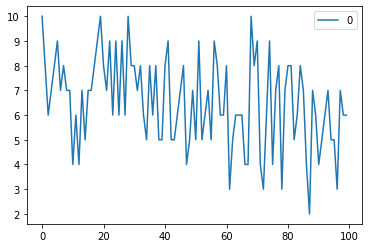

In [29]:
sns.lineplot(data=pd.DataFrame(num_txs))

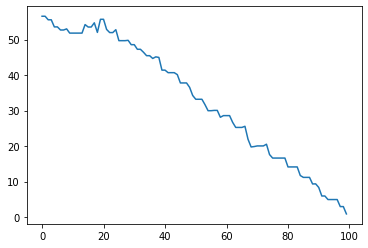

In [19]:
plt.plot(consensus)

In [20]:
consensus[-1]

0.9029283711848597

In [21]:
min(consensus)

0.9029283711848597